# Hierarchical clustering, Figure1A, S5

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os,sys
from scipy import stats
from collections import Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
print(sys.version)

3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:33:30) 
[Clang 9.0.1 ]


In [3]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn" -e "umap-learn"

matplotlib            3.3.2
matplotlib-inline     0.1.3
numpy                 1.19.5
pandas                1.2.3
scipy                 1.7.3
seaborn               0.11.2
umap-learn            0.5.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [5]:
store="../results/"

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,cophenet,distance,set_link_color_palette

In [7]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_before_clustering.txt"
               ,low_memory=False,sep="\t",index_col=0)

# Hierarchical clustering in Mutect2, MuSE,SomaticSniper,VarScan2

In [8]:
# From mutect2
df_mutsig=df.loc[:,df.columns.str.contains("^Sig_")]
df_mutsig_log10=np.log10(df_mutsig+1)

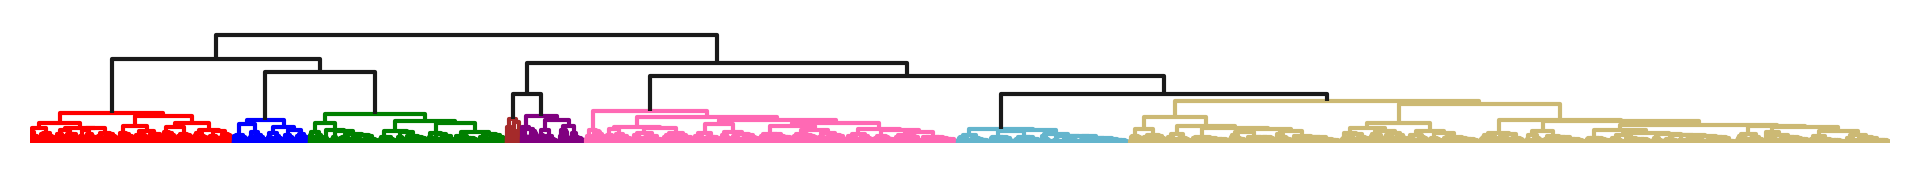

In [9]:
# dendrogram
input_df=df_mutsig_log10
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.45 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
cluster_colors=['red', 'blue', 'green', 'brown', 'purple','hotpink',"c","y"]
# plot dendrogram
set_link_color_palette(cluster_colors)
fig=plt.figure( figsize=(8, 0.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,no_labels=True,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
#plt.savefig(store+"Cluster_dendrogram_by_mutect2.png",dpi=300,bbox_inches="tight")

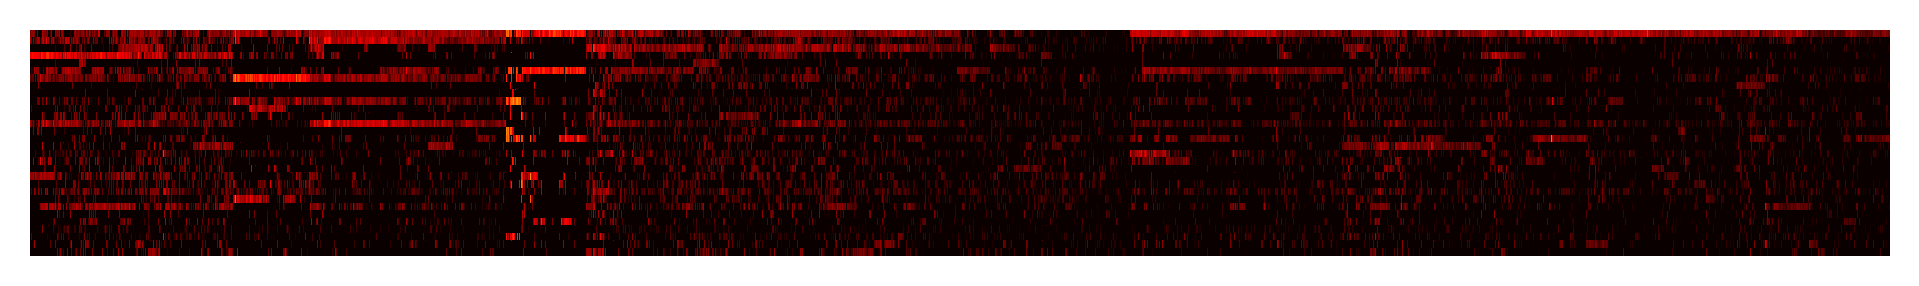

In [10]:
sns_df=input_df.iloc[ np.array(d["ivl"],dtype=int),:]
sns_df.index.name=None
fig=plt.figure( figsize=(8,1),facecolor='w')
ax = fig.add_subplot(1,1,1)
ax=sns.heatmap(sns_df.T,yticklabels=0,xticklabels=0,cbar=False,vmin=0,vmax=7,cmap="hot")
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_heatmap30.png",dpi=300,bbox_inches="tight")

In [11]:
dict_id_clusters={}
for i,pid in enumerate(input_df.index):
    if pid not in dict_id_clusters:
        dict_id_clusters[pid]={}
    dict_id_clusters[pid]["Mutect2"]=clusters[i]

In [12]:
# sort data in order of mutect2 clustering
df=df.iloc[ np.array(d["ivl"],dtype=int),:]

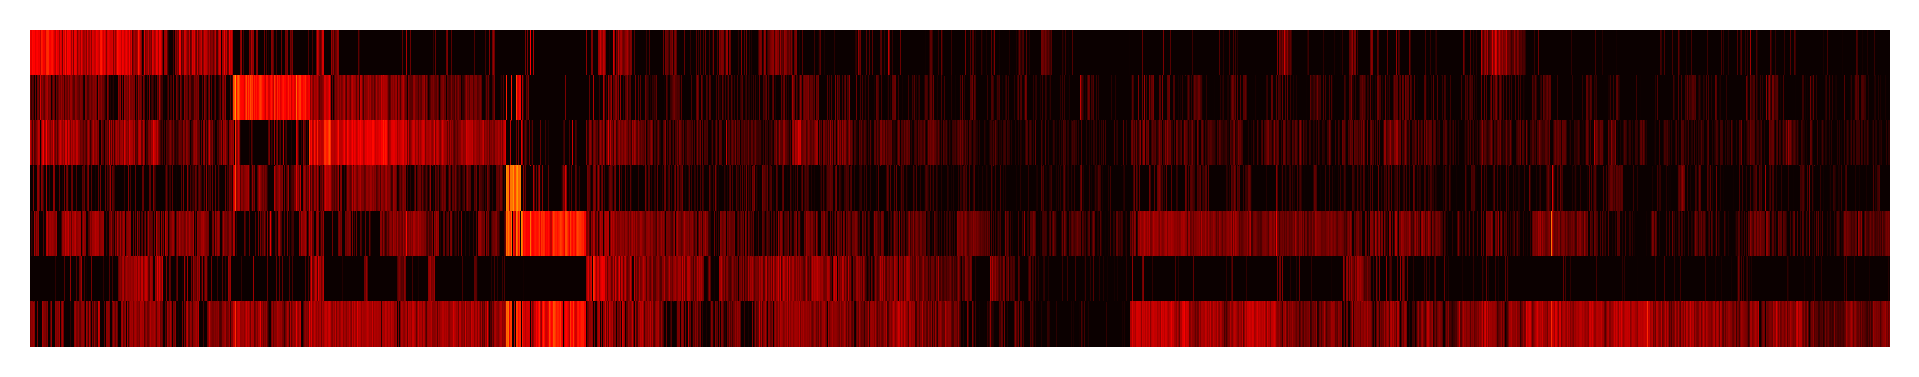

In [13]:
# extract annotated signatures
sns_df=df.copy()
sns_df=sns_df.loc[:, [x+"_Sigs" for x in ["Smoking","UV","APOBEC","POLE","MMRD","HRD","Aging"]]].copy()
sns_df=np.log10(sns_df+1)
sns_df.index.name=None

fig=plt.figure( figsize=(8, 1.4),facecolor='w')
ax = fig.add_subplot(1,1,1)
ax=sns.heatmap(sns_df.T,yticklabels=0,xticklabels=0,cbar=False,vmin=0,vmax=7,cmap="hot")
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_heatmap7.png",dpi=300,bbox_inches="tight")

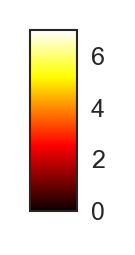

In [14]:
import matplotlib as mpl
cmap=plt.get_cmap("hot")
vmin=0
vmax=7
bounds=[0,2,4,6]

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig=plt.figure(figsize=(0.2,0.8) )
ax=fig.add_subplot(111)
mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,ticks=bounds,orientation = 'vertical')
ax.tick_params(labelsize=6)

In [15]:
# from muse
dir_path="../data"
muse=pd.read_csv( os.path.join(dir_path,"TCGA_muse_mutsig_count_v2.tsv")
                   ,sep="\t",index_col=0)
selected=muse.index.isin(df.index)
muse=muse.loc[selected,:]
muse=muse.dropna()
muse.columns=[x.replace("Signature","Sig") for x in muse.columns]
print("muse",muse.shape)

# from varscan
varscan=pd.read_csv( os.path.join(dir_path,"TCGA_varscan_mutsig_count_v2.tsv")
                   ,sep="\t",index_col=0)
selected=varscan.index.isin(df.index)
varscan=varscan.loc[selected,:]
varscan=varscan.dropna()
varscan.columns=[x.replace("Signature","Sig") for x in varscan.columns]
print("varscan2", varscan.shape)

# from somaticsniper
somaticsniper=pd.read_csv( os.path.join(dir_path,"TCGA_somaticsniper_mutsig_count_v2.tsv")
                   ,sep="\t",index_col=0)
selected=somaticsniper.index.isin(df.index)
somaticsniper=somaticsniper.loc[selected,:]
somaticsniper=somaticsniper.dropna()
somaticsniper.columns=[x.replace("Signature","Sig") for x in somaticsniper.columns]
print("somatic sniper", somaticsniper.shape)

muse (9726, 30)
varscan2 (9721, 30)
somatic sniper (9642, 30)


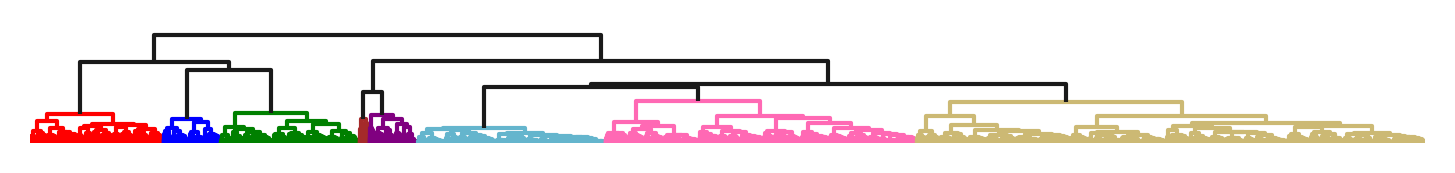

In [16]:
input_df=muse
input_df=np.log10(input_df.iloc[:,0:30] +1)
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.40 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
cluster_colors=['red', 'blue', 'green', "brown", 'purple', "c",'hotpink','y']
# plot dendrogram
set_link_color_palette(cluster_colors)
fig=plt.figure( figsize=(6, 0.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,no_labels=True,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
#plt.savefig(store+"Cluster_dendrogram_by_muse_comp.png",dpi=300,bbox_inches="tight")

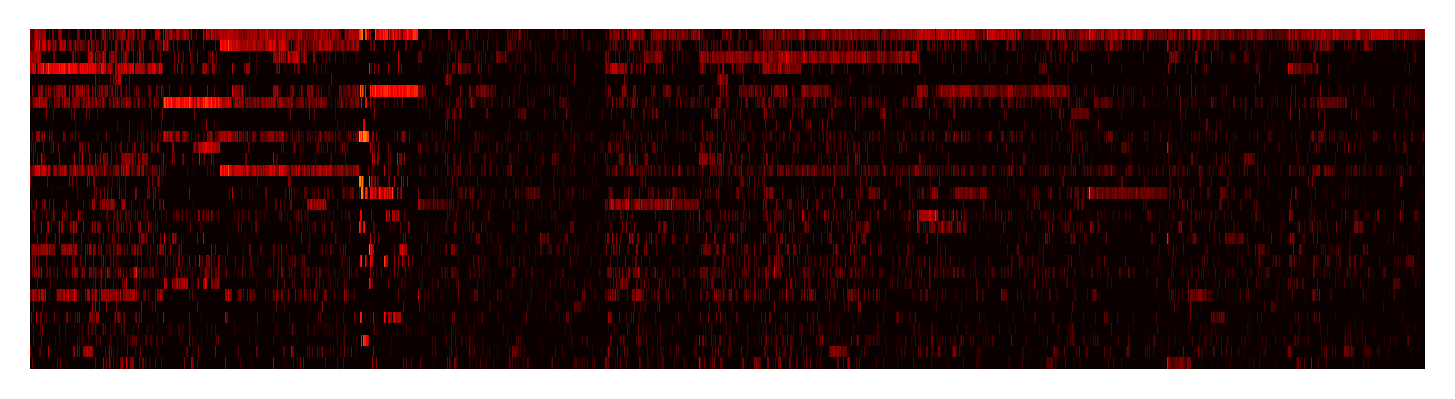

In [17]:
sns_df=input_df.iloc[ np.array(d["ivl"],dtype=int),:]
sns_df.index.name=None
fig=plt.figure( figsize=(6, 1.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
ax=sns.heatmap(sns_df.T,yticklabels=0,xticklabels=0,cbar=False,vmin=0,vmax=7,cmap="hot")
#plt.savefig(store+"Cluster_dendrogram_by_muse_heatmap30.png",dpi=300,bbox_inches="tight")

In [18]:
for i,pid in enumerate(input_df.index):
    if pid not in dict_id_clusters:
        dict_id_clusters[pid]={}
    dict_id_clusters[pid]["MuSE"]=clusters[i]

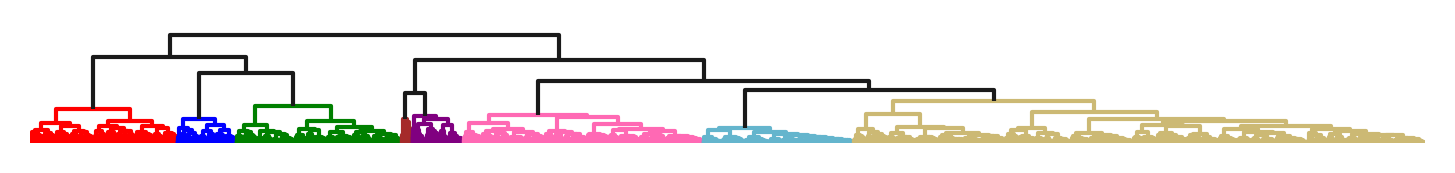

In [19]:
input_df=varscan
input_df=np.log10(input_df.iloc[:,0:30] +1)
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.40 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']

set_link_color_palette(cluster_colors)

fig=plt.figure( figsize=(6, 0.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,no_labels=True,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
#plt.savefig(store+"Cluster_dendrogram_by_varscan_comp.png",dpi=300,bbox_inches="tight")

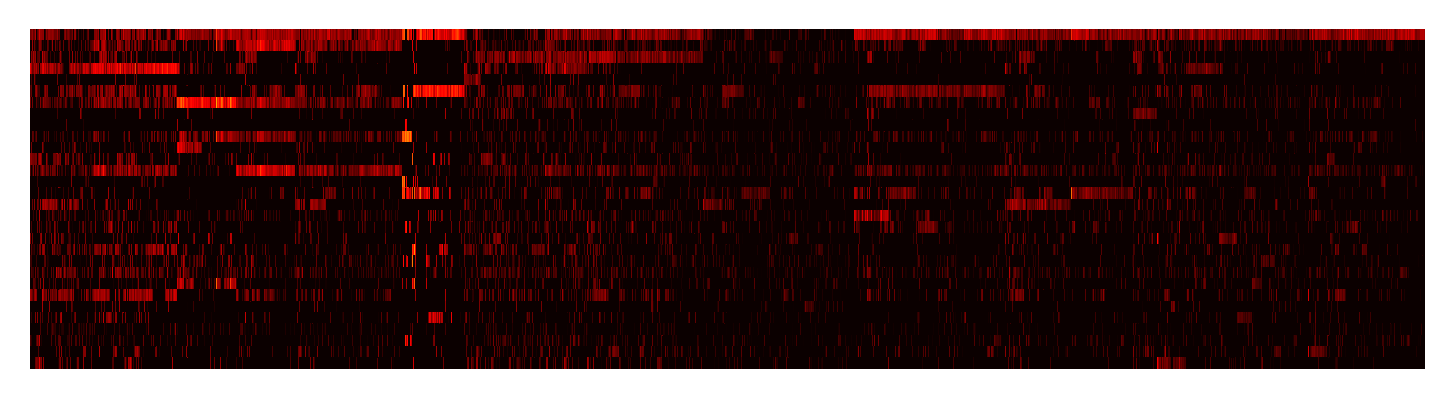

In [20]:
sns_df=input_df.iloc[ np.array(d["ivl"],dtype=int),:]
sns_df.index.name=None
fig=plt.figure( figsize=(6, 1.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
ax=sns.heatmap(sns_df.T,yticklabels=0,xticklabels=0,cbar=False,vmin=0,vmax=7,cmap="hot")
#plt.savefig(store+"Cluster_dendrogram_by_varscan_heatmap30.png",dpi=300,bbox_inches="tight")

In [21]:
for i,pid in enumerate(input_df.index):
    if pid not in dict_id_clusters:
        dict_id_clusters[pid]={}
    dict_id_clusters[pid]["VarScan2"]=clusters[i]

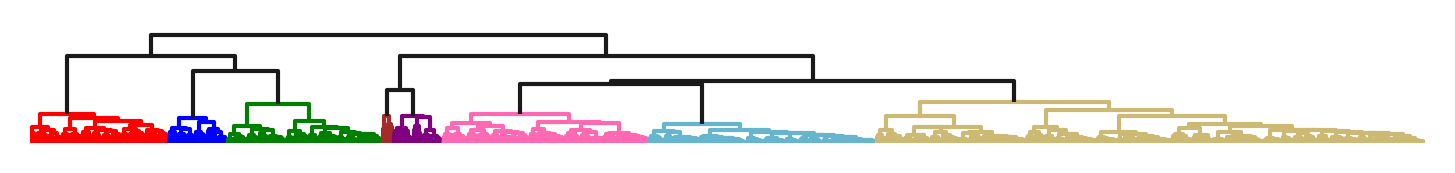

In [22]:
input_df=somaticsniper
input_df=np.log10(input_df.iloc[:,0:30] +1)
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.40 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']

set_link_color_palette(cluster_colors)

fig=plt.figure( figsize=(6, 0.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,no_labels=True,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
#plt.savefig(store+"Cluster_dendrogram_by_somaticsniper_comp.png",dpi=300,bbox_inches="tight")

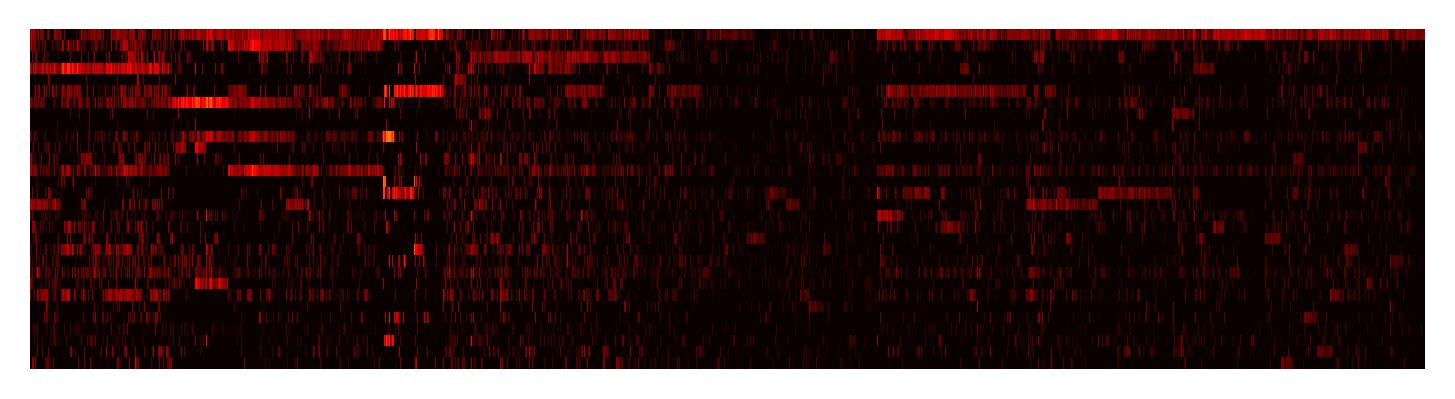

In [23]:
sns_df=input_df.iloc[ np.array(d["ivl"],dtype=int),:]
sns_df.index.name=None
fig=plt.figure( figsize=(6, 1.5),facecolor='w')
ax = fig.add_subplot(1,1,1)
ax=sns.heatmap(sns_df.T,yticklabels=0,xticklabels=0,cbar=False,vmin=0,vmax=7,cmap="hot")
#plt.savefig(store+"Cluster_dendrogram_by_somaticsniper_heatmap30.png",dpi=300,bbox_inches="tight")

In [24]:
for i,pid in enumerate(input_df.index):
    if pid not in dict_id_clusters:
        dict_id_clusters[pid]={}
    dict_id_clusters[pid]["SomaticSniper"]=clusters[i]

# make consencus annotations

In [25]:
df_id_clusters=pd.DataFrame.from_dict(dict_id_clusters).T
df_id_clusters.sort_index(inplace=True)
df_id_clusters.head()

,Mutect2,MuSE,VarScan2,SomaticSniper
TCGA-02-0003,5.0,6.0,5.0,3.0
TCGA-02-0033,5.0,6.0,5.0,3.0
TCGA-02-0047,5.0,6.0,5.0,3.0
TCGA-02-0055,5.0,6.0,5.0,3.0
TCGA-02-2466,3.0,6.0,5.0,3.0


In [26]:
dict_mutect={5:"AGE",3:"HRD",6:"SMK",8:"APB", 4:"GNS",7:"UVL",2:"MRD",1:"POL"}
dict_muse={1:"SMK",2:"UVL",3:"APB",4:"POL",5:"MRD",6:"AGE",7:"GNS",8:"HRD"}
dict_varscan={5:"AGE",8:"APB",4:"GNS",3:"HRD",2:"MRD",1:"POL",6:"SMK",7:"UVL"}
dict_ssniper={3:"AGE",8:"APB",4:"GNS",5:"HRD",2:"MRD",1:"POL",6:"SMK",7:"UVL"}

In [27]:
df_id_clusters["Mutect2"]=df_id_clusters["Mutect2"].replace(dict_mutect)
df_id_clusters["MuSE"]=df_id_clusters["MuSE"].replace(dict_muse)
df_id_clusters["VarScan2"]=df_id_clusters["VarScan2"].replace(dict_varscan)
df_id_clusters["SomaticSniper"]=df_id_clusters["SomaticSniper"].replace(dict_ssniper)
df_id_clusters

,Mutect2,MuSE,VarScan2,SomaticSniper
TCGA-02-0003,AGE,AGE,AGE,AGE
TCGA-02-0033,AGE,AGE,AGE,AGE
TCGA-02-0047,AGE,AGE,AGE,AGE
TCGA-02-0055,AGE,AGE,AGE,AGE
TCGA-02-2466,HRD,AGE,AGE,AGE
...,...,...,...,...
TCGA-ZS-A9CE,SMK,SMK,SMK,SMK
TCGA-ZS-A9CF,HRD,HRD,HRD,HRD
TCGA-ZS-A9CG,HRD,SMK,HRD,HRD
TCGA-ZU-A8S4,HRD,GNS,AGE,AGE


In [28]:
# for Venn diagram in R
r_dir="../analysis_in_R/"
df_id_clusters.to_csv(r_dir+"TCGA_4callers_8clusters_counts_for_R_Venn.tsv",sep="\t")

In [29]:
most_common=[]
for idx in df_id_clusters.index:
    c=Counter(df_id_clusters.loc[idx,:]).most_common()
    most_common.append( c[0] )
df_id_clusters["MostCommon"]=most_common

In [30]:
c_all=[]
c_m2p2=[]
c_m2=[]

for idx in df.index:
    subtype=df_id_clusters.loc[ idx, "MostCommon"] [0]
    count=df_id_clusters.loc[ idx, "MostCommon"] [1]
    m2=df_id_clusters.loc[idx, "Mutect2"]
    c_m2.append(m2)
    if count==4:
        c_all.append(m2)
        c_m2p2.append(m2)
    else:
        c_all.append(np.nan)
    
    if count==3:
        if subtype==m2:
            c_m2p2.append(m2)
        else:
            c_m2p2.append(np.nan)  
    
    if count in [1,2]:
        c_m2p2.append(np.nan)

In [31]:
df["cluster_m2_names"]=c_m2
df["cluster_m2p2_names"]= c_m2p2
df["cluster_all_names"]= c_all
Counter(c_m2p2)

Counter({nan: 2613,
         'SMK': 801,
         'UVL': 390,
         'APB': 825,
         'POL': 73,
         'MRD': 330,
         'HRD': 1119,
         'GNS': 633,
         'AGE': 3010})

In [32]:
# Write out for furthur analysis
df.to_csv("../data/TCGA_integrated_data_after_clustering.tsv",sep="\t")

# UMAP, Projection

In [33]:
import umap

In [34]:
# set colors
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']

dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey"}
df["cluster_m2_colors"]=[ dict_cluster_colors[cluster] for cluster in df["cluster_m2_names"] ]

dict_cluster_numbers={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}
df["cluster_m2_numbers"]=[  dict_cluster_numbers [cluster] for cluster in df["cluster_m2_names"] ]

In [35]:
# all
df_mutsig=df.loc[:,df.columns.str.startswith("Sig_")]
plt_df=np.log10(df_mutsig+1)
trans=umap.UMAP(random_state=1, n_components=2,
                               n_neighbors=10
                              ,min_dist=0.35
                            ,metric='euclidean',).fit(plt_df)
X=trans.transform(plt_df)

In [36]:
## random shuffle before plotting
shuffle_numbers=np.arange(len(X))
np.random.seed(777)
np.random.shuffle(shuffle_numbers)
X=X[shuffle_numbers,:]
colors=[df["cluster_m2_colors"][x]  for x in shuffle_numbers]

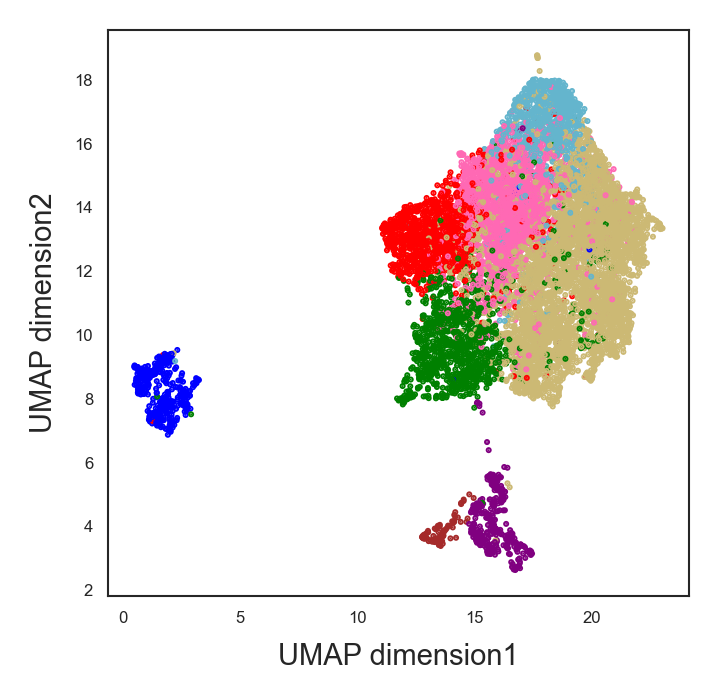

In [37]:
fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(1,1,1)    
ax.scatter(X[:, 0], X[:, 1], c=colors,s=0.2)
ax.set_xlabel("UMAP dimension1",fontsize=7)
ax.set_ylabel("UMAP dimension2",fontsize=7)
ax.tick_params(labelsize=4)
#plt.savefig(store+"UMAP_all_samples.png",dpi=300,bbox_inche="tight")

# Selected cases 

In [38]:
dfw = df[~ df["cluster_m2p2_names"].isna()]
dfw.shape

(7181, 254)

In [39]:
# projection of selected cases
df_mutsig=dfw.loc[:,dfw.columns.str.startswith("Sig_")]
plt_df=np.log10(df_mutsig+1)
X=trans.transform(plt_df)

In [40]:
## random shuffle before plotting
shuffle_numbers=np.arange(len(X))
np.random.seed(777)
np.random.shuffle(shuffle_numbers)
X=X[shuffle_numbers,:]
colors=[dfw["cluster_m2_colors"][x]  for x in shuffle_numbers]

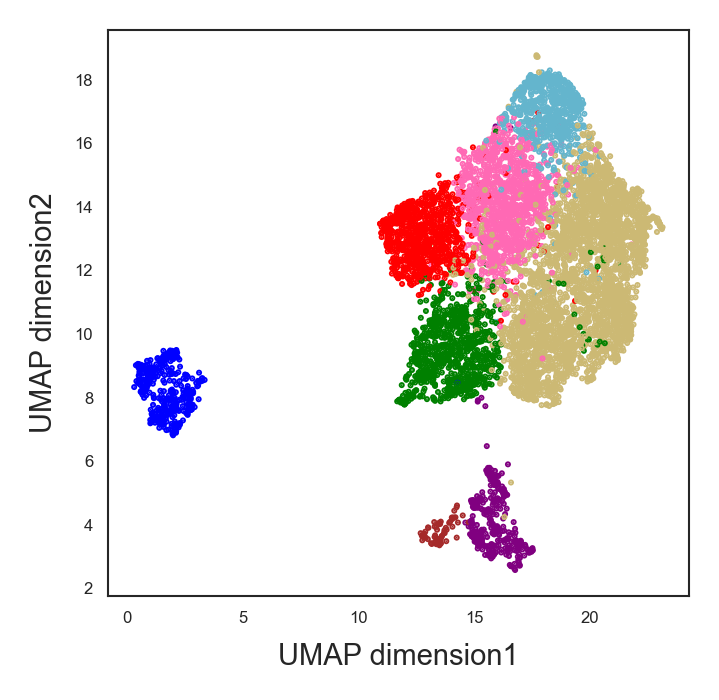

In [41]:
fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(1,1,1)    
ax.scatter(X[:, 0], X[:, 1], c=colors,s=0.2)
ax.set_xlabel("UMAP dimension1",fontsize=7)
ax.set_ylabel("UMAP dimension2",fontsize=7)
ax.tick_params(labelsize=4)
#plt.savefig(store+"UMAP_m2p2_samples.png",dpi=300,bbox_inches="tight")

# Write out for making classifiers

In [42]:
df_mutsig=dfw.loc[:,dfw.columns.str.startswith("Sig_")]
plt_df=np.log10(df_mutsig+1)
plt_df

,Sig_1,Sig_2,Sig_3,Sig_4,Sig_5,Sig_6,Sig_7,Sig_8,Sig_9,Sig_10,Sig_11,Sig_12,Sig_13,Sig_14,Sig_15,Sig_16,Sig_17,Sig_18,Sig_19,Sig_20,Sig_21,Sig_22,Sig_23,Sig_24,Sig_25,Sig_26,Sig_27,Sig_28,Sig_29,Sig_30
TCGA-75-5126,1.334063,1.875021,0.0,2.661550,0.0,0.286575,0.863936,0.0,0.000000,0.710120,0.0,0.000000,1.895948,0.0,0.000000,0.0,0.000000,1.368333,0.0,1.755399,0.000000,1.002302,0.0,0.000000,0.0,0.0,0.816736,0.167481,0.0,0.0
TCGA-05-4410,1.793566,1.885999,0.0,2.992602,0.0,0.000000,1.310370,0.0,0.000000,0.000000,0.0,0.000000,1.802393,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.729939,0.000000,1.310326,0.0,0.000000,0.0,0.0,0.000000,0.119172,0.0,0.0
TCGA-OR-A5JB,1.178243,1.672223,0.0,2.429289,0.0,0.000000,0.979917,0.0,0.000000,0.000000,0.0,0.000000,1.604990,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.444871,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
TCGA-62-8399,1.654268,1.927778,0.0,2.491066,0.0,1.498923,0.000000,0.0,0.000000,1.095529,0.0,0.000000,2.072570,0.0,0.000000,0.0,0.863310,0.237051,0.0,1.435106,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
TCGA-33-6737,0.000000,1.799645,0.0,2.368170,0.0,1.444228,1.585332,0.0,0.000000,1.102891,0.0,0.000000,2.170894,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.593119,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.502234,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-TM-A84T,1.134683,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.204967,0.000000,0.0,0.000000,0.386143,0.0,1.099404,0.0,0.000000,0.000000,0.0,0.000000,0.411837,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
TCGA-HT-8012,1.133509,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.312947,0.0,1.112571,0.0,0.110143,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
TCGA-HW-A5KM,1.005662,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.166051,0.000000,0.0,0.115032,0.284600,0.0,1.006907,0.0,0.176758,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.022586,0.0,0.0
TCGA-C8-A9FZ,1.221371,0.193987,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.095094,0.0,1.247033,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.145065,0.0,0.0,0.000000,0.000000,0.0,0.0


In [43]:
plt_df.to_csv("../results/TCGA_7181_df_mutsig_log10.tsv",sep="\t")

In [44]:
dfw["cluster_m2_names"].to_csv("../results//TCGA_7181_cluster_annotations.tsv", index=False, header=None)
dfw["cluster_m2_colors"].to_csv("../results/TCGA_7181_cluster_colors.tsv", index=False, header=None)
dfw["cluster_m2_numbers"].to_csv("../results/TCGA_7181_cluster_numbers.tsv", index=False, header=None)